---
layout: notes
chapter: 8
chapter-title: Dimensionality Reduction
permalink: /ml-book/chapter8/notes.html
---

## Dimensionality Reduction
* The primary reason for dimensionality reduction is that it speeds up training without a loss in performance.
* Examples:
  * Merging pixels in an image which are neighbors
  * Removing bordering pixels from an image


## The Curse of Dimensionality
* Many things behave much differently in higher dimensions
* The distance between two points in a unit square (2D) is 0.52, but in a 1,000,000 dimensional hypercube it is 408.25 (1,000,000 / 6)^0.5. This shows that large dimensional datasets are inherently sparse (i.e. training samples lie far from one another). 
* The more dimensions a training set has the greater the risk of overfitting

## Main Approaches for Dimensionality Reduction
* Two main approaches to dimensionality reduction: projection and Manifold Learning

### Projection
* An example would be projecting a 3D dataset down to a 2D plane
* However, it's not always trivial to make this projection. Seen below is the Swiss roll toy dataset. The first row projection does a much better job of preserving the separation of data

![image](https://user-images.githubusercontent.com/29719483/211162408-3110d859-a5de-43e8-8b2b-5753391fa8a2.png)

### Manifold Learning
* This Swiss roll is an example of a 2D manifold
* A 2D manifold is a 2D shape that can be manipulated into a higher-dimensional space
* Many dimensionality reduction algorithms work by modeling the manifold on which the training instances lie (known as Manifold Learning)
* The manifold hypothesis states that most real-world high-dimensional datasets lie close to a much lower-dimensional manifold
* Another assumption follows, that machine learning will be simpler if expressed in the lower-dimensional space
* This is not always true however, occassionally the original orientation of the data better preserves its structure

## PCA
* Principal Component Analysis (PCA) is the most popular dimensionality reduction technique
* It works by finding the hyperplane which lies closest to the data and then projecting the data onto that hyperplane

### Preserving the Variance
* In order to project the data, it's best to select the hyperplane which preserves the maximum amount of variance in the dataset and this is the objective of PCA

### Principal Components
* PCA identifies the axis which accounts for the largest amount of variance in the dataset
* If it were a higher-dimensional dataset, PCA would also find the next orthogonal axis which contains the most variance
* The unit vector that defines the ith axis is called the ith principal component (PC)
* Use Singular Value Decomposition (SVD) to split the training set matrix into three components:
![image](https://user-images.githubusercontent.com/29719483/211163556-d2574ce6-ca3e-49d0-9045-ea3e911752d1.png)
* Here V* contains all principal components
* PCA assumes that the dataset is centered around the origin

### Projecting Down to d Dimensions
* After identifying the principal components, dimensionality is reduced by projecting the dataset onto the *d* dimensions

### Using Scikit-Learn

[[ 0.41519158  0.40126542  0.81645699]
 [-0.70305236  0.71109263  0.00804027]]


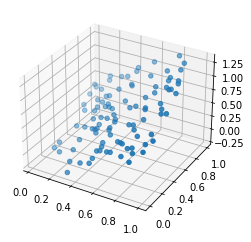

In [18]:

from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

X = np.random.random((100, 2))
X = np.concatenate((X, np.abs(np.sum(X, axis=1)).reshape((-1, 1)) - 0.5), axis=1)
ax = plt.figure().add_subplot(projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2])
pca = PCA(n_components=2)
X2D = pca.fit_transform(X)
print(pca.components_)

### Explained Variance Ratio
* The explained variance ratio allows you to determine how much variance lies along each principal component

### Choosing the Right Number of Dimensions
* Generally you would reduce down to as many dimensions as can account for most of the variance (95%)
* For data visualization you'll want to reduce down to 2 or 3 dimensions so anyone can see what's going on
* You can use a float between 0.0 and 1.0 to get the appropriate number of dimensions to explain 95% of the variance (i.e. `n_components = 0.95`)

### PCA for Compression
* For MNIST PCA covering 95% of the variance reduces from 784 to 150 features
* You can use the inverse transformation to decompress the data back to its original dimensions
* The 5% unaccounted for variance during this inverse transformation is know as the reconstruction error

### Incremental PCA
* Incremental PCA allows you to run PCA without needing the whole dataset to do SVD
* See `sklearn.decomposition.IncrementalPCA` for details

### Randomized PCA
* Randomized PCA uses a stochastic algorithm to quickly find an approximation of the first *d* principal components
* It's faster when $d << n$

## Kernel PCA
* Kernel PCA uses the kernel trick to apply PCA to nonlinear projections for dimensionality reduction
* It is often good at preserving clusters of instances after projection, or sometimes even unrolling datasets that lie close to a twisted manifold
* Swiss roll example using various kernels:

![image](https://user-images.githubusercontent.com/29719483/211166405-dc9b7304-561a-42b8-968e-34771073ea5b.png)

### Selecting a Kernel and Tuning Hyperparameters
* There's no obvious performance measure for kPCA so it can be combined with grid search to produce the best end result : /
* There is no true reconstruction error because of the way the kernel trick works. Instead there is what's known as a pre-image which to my understanding is an approximation of the 2D reduced data, but in the original space. It serves as an approximate way to calculate the reconstruction error.
* Reducing the pre-image reconstruction error is a viable way to find the best kernel for dimensionality reduction (e.g. through grid search on parameters)

## LLE
* Locally Linear Embedding (LLE) is a non-linear dimensionality reduction technique
* It works by measuring the linear relationship to a data points neighbors and then trying to produce a lower dimensional representation of that data where those relationships are still preserved
* Good for complex manifolds, but doesn't scale to large datasets

## Other Dimensionality Reduction Techniques
* Multidimensional Scaling (MDS) - reduces dimensionality whilst trying to preserve the distances between the instances
* Isomap - Tries to preserve geodesic distances between instances
* t-Distributed Stochastic Neighbor Embedding (t-SNE) - Keep similar instances close and dissimilar instances far apart through dimensionality reduction
* Linear Discriminant Analysis (LDA) -  A classification algorithm which finds the most discriminative axes between classes